---
---
# **SERIES DE TIEMPO**

Trabajo Práctico - UNIDAD 1 - Análisis de Series de Tiempo

Estudiante: Gonzalo Cayunao Erices

Docente: Paulette N. Reyes Baeza

<img src='https://cdn-icons-png.flaticon.com/512/25/25231.png' width=3%>   [Github con el código desarrollado](https://github.com/gonzakayunawel/series_de_tiempo)

---
---
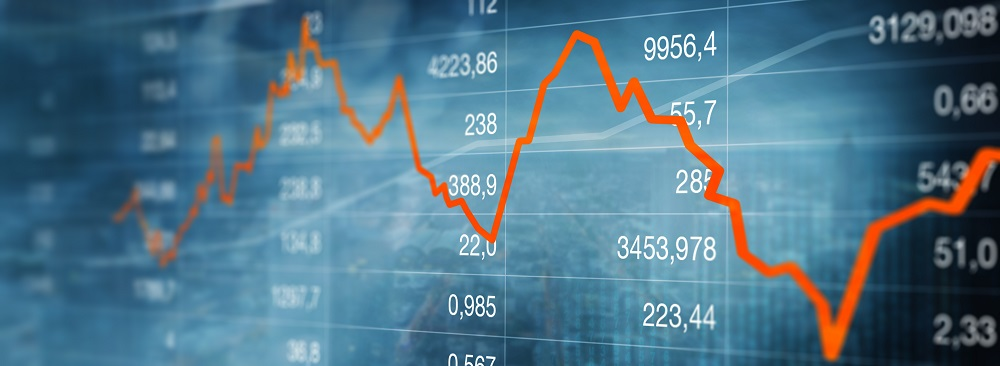

# **1. ANÁLISIS EXPLORATORIO**
---

## **1.1. Librerías y módulos**

In [1]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns


---


## **1.2. Carga de datos**

Para este análisis de series de tiempo se utilizará los datos de la librería Yahoo Finance.
Los datos seleccionados corresponde a los precios de la acción de la empresa de Hardware para Inteligencia Artificial y Videojuegos NVIDIA.

In [2]:
ticker = 'NVDA' # Ticker de la compañía
start_date = dt.date(2014, 12, 10) # Fecha de inicio
end_date = dt.date(2024, 12, 10) # Fecha de fin

stock_data = yf.download(ticker, start=start_date, end=end_date) # Descarga los datos de la compañía
stock_data['Date'] = stock_data.index # Agrega una columna Date a la tabla

[*********************100%***********************]  1 of 1 completed


In [3]:
# Resumen del dataset
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-12-10 to 2024-12-09
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   (Adj Close, NVDA)  2516 non-null   float64       
 1   (Close, NVDA)      2516 non-null   float64       
 2   (High, NVDA)       2516 non-null   float64       
 3   (Low, NVDA)        2516 non-null   float64       
 4   (Open, NVDA)       2516 non-null   float64       
 5   (Volume, NVDA)     2516 non-null   int64         
 6   (Date, )           2516 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 157.2 KB


In [4]:
#Primeros registros
stock_data.head()

Price,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
2014-12-10,0.486504,0.50675,0.51875,0.50625,0.51675,204364000,2014-12-10
2014-12-11,0.486264,0.50650,0.51325,0.50550,0.50975,135652000,2014-12-11
2014-12-12,0.471143,0.49075,0.50425,0.49025,0.49975,323964000,2014-12-12
2014-12-15,0.469703,0.48925,0.50550,0.48775,0.49650,254696000,2014-12-15
2014-12-16,0.464423,0.48375,0.49650,0.48350,0.48875,185308000,2014-12-16


In [5]:
#Ultimos registros
stock_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
Date,,,,,,,
2024-12-03,140.250336,140.259995,140.539993,137.949997,138.259995,164414000,2024-12-03
2024-12-04,145.130005,145.139999,145.789993,140.289993,142.000000,231224300,2024-12-04
2024-12-05,145.059998,145.059998,146.539993,143.949997,145.110001,172621200,2024-12-05
2024-12-06,142.440002,142.440002,145.699997,141.309998,144.600006,188505600,2024-12-06
2024-12-09,138.809998,138.809998,139.949997,137.130005,138.970001,189308600,2024-12-09


## **1.3. Preprocesamiento**

In [6]:
# Datos faltantes
stock_data.isnull().sum()

Price      Ticker
Adj Close  NVDA      0
Close      NVDA      0
High       NVDA      0
Low        NVDA      0
Open       NVDA      0
Volume     NVDA      0
Date                 0
dtype: int64

In [7]:
# Datos duplicados
stock_data.duplicated().sum()

np.int64(0)

## **1.4. Análisis Estadístico**

In [8]:
# Establecer el formato de punto flotante a 2 decimales
pd.options.display.float_format = '{:.2f}'.format

In [9]:
# Resumen estadistico
stock_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume,Date
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA,NVDA,
count,2516.00,2516.00,2516.00,2516.00,2516.00,2516.00,2516
mean,19.99,20.02,20.38,19.62,20.02,467549074.52,2019-12-10 00:25:45.310015744
min,0.46,0.48,0.49,0.47,0.48,45644000.00,2014-12-10 00:00:00
25%,3.40,3.43,3.50,3.37,3.42,306380925.00,2017-06-11 06:00:00
50%,6.34,6.39,6.51,6.27,6.38,415169500.00,2019-12-09 12:00:00
75%,20.66,20.70,21.03,20.37,20.75,564021000.00,2022-06-08 06:00:00
max,148.87,148.88,152.89,146.26,149.35,3692928000.00,2024-12-09 00:00:00
std,31.11,31.11,31.68,30.49,31.14,253790778.42,NaN


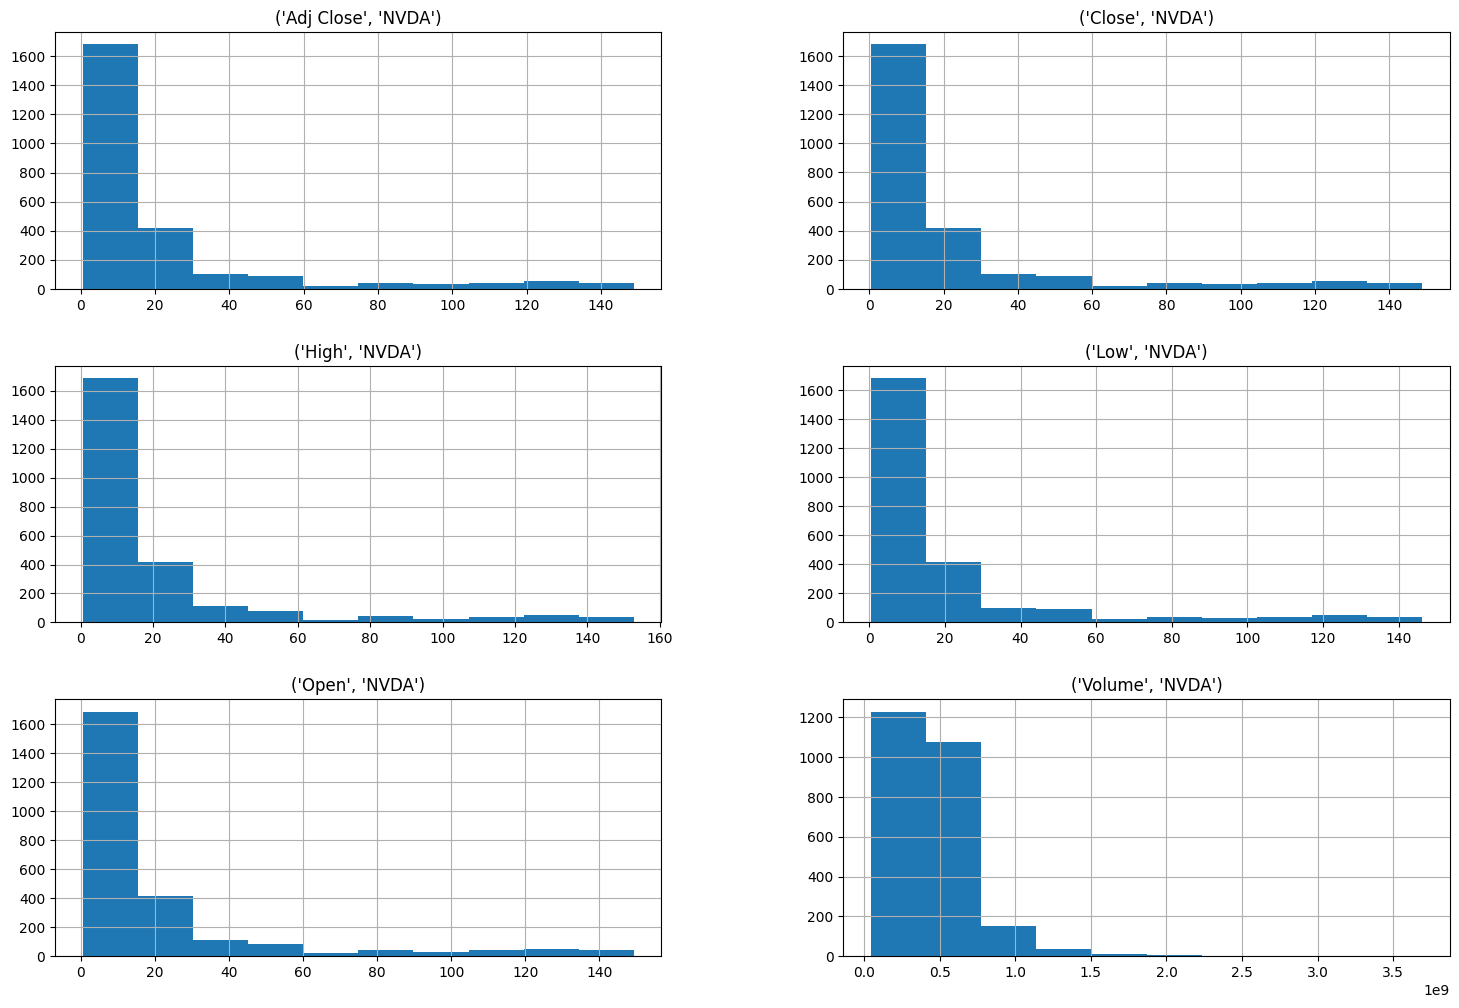

In [10]:
# Histograma
stock_data.drop(['Date'], axis=1).hist(figsize=(18, 12))
plt.show()

In [11]:
# Seleccionar solo las columnas numéricas
df_numeric = stock_data.select_dtypes(include=['number'])

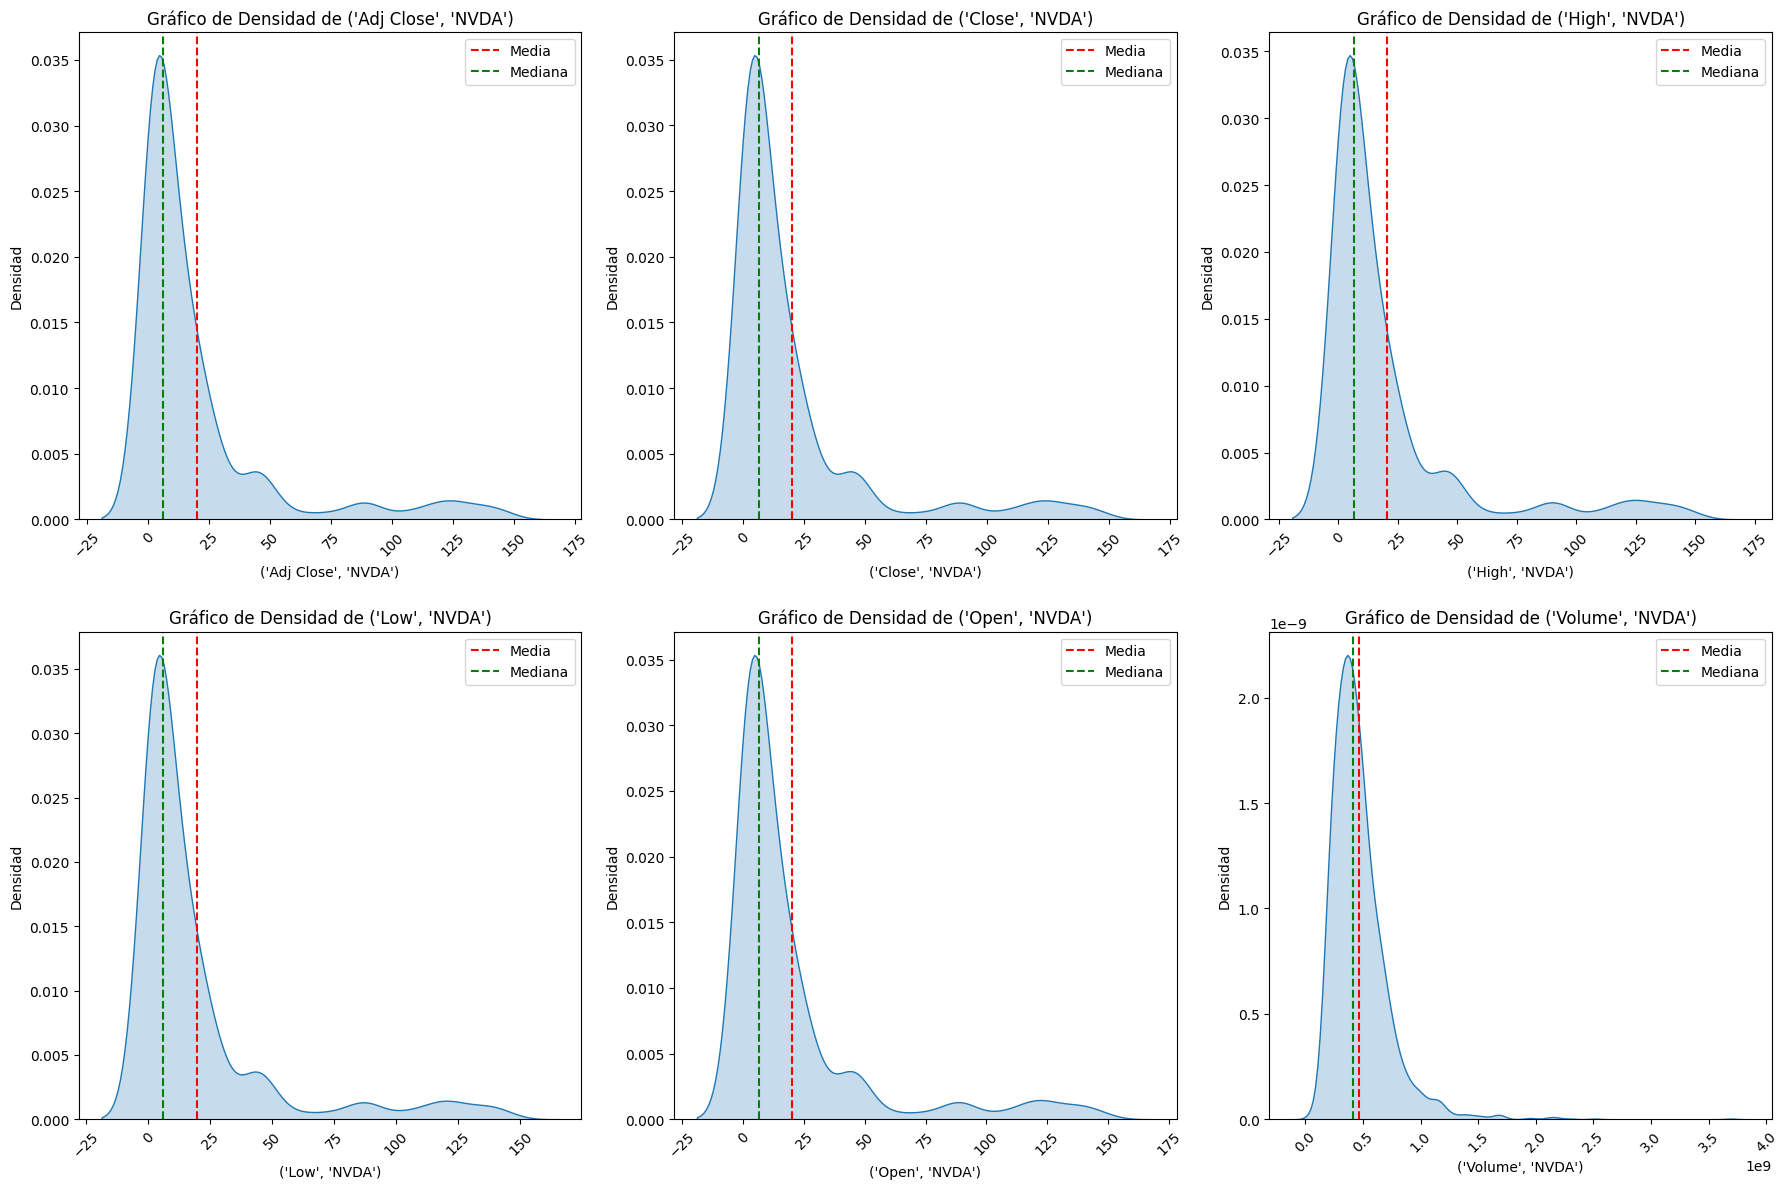

In [12]:
# Número total de gráficos y tamaño de la cuadrícula
num_cols = 3
num_rows = 2
total_plots = num_cols * num_rows

# Crea la figura y los ejes para los subgráficos
fig, axes = plt.subplots(
    num_rows, num_cols, figsize=(18, 12)
)  # Ajusta el tamaño si es necesario
axes = axes.flatten()  # Aplana la matriz de ejes para facilitar la indexación

# Itera a través de las columnas numéricas y crea gráficos de densidad
for i, column in enumerate(df_numeric.columns):
    if i < total_plots:  # Asegúrate de que no excedas el número de subgráficos
        sns.kdeplot(df_numeric[column], fill=True, ax=axes[i])  # Gráfico de densidad

        # Calcular la media y dibujar una línea vertical en la media
        mean_value = df_numeric[column].mean()
        axes[i].axvline(
            mean_value, color="red", linestyle="--", label="Media"
        )  # Línea de la media

        # Calcular la mediana y dibujar una línea vertical en la mediana
        median_value = df_numeric[column].median()
        axes[i].axvline(
            median_value, color="green", linestyle="--", label="Mediana"
        )  # Línea de la mediana

        axes[i].set_xlabel(column)  # Título del eje x con el nombre de la columna
        axes[i].set_ylabel("Densidad")  # Título del eje Y
        axes[i].set_title(f"Gráfico de Densidad de {column}")  # Título del gráfico
        axes[i].tick_params(axis="x", rotation=45)  # Rotar etiquetas del eje X

        # Agregar leyenda
        axes[i].legend()

    else:
        axes[i].axis("off")  # Apagar ejes no utilizados

# Ajustar el layout
plt.tight_layout()
plt.show()  # Mostrar todos los gráficos

1. Distribución Asimétrica: Al examinar las series de precios de las acciones de NVIDIA, hemos observado que presentan una distribución asimétrica con sesgo positivo. Esto indica que la mayoría de los valores se agrupan en los rangos más bajos, mientras que hay un número notable de precios excepcionalmente altos. Este fenómeno provoca que la media de los precios de las acciones sea arrastrada al alza por estos valores extremos, lo que sugiere que hay una mayor probabilidad de que los precios se encuentren por debajo de la media en comparación con los que se ubiquen por encima.

2. Curtosis: Además, los datos muestran características de leptocurtosis (alta curtosis). Esto significa que la distribución tiene colas más pesadas en comparación con una distribución normal, lo que implica que hay una probabilidad aumentada de que se produzcan movimientos extremos en los precios, ya sea en forma de aumentos significativos o caídas abruptas. Esta alta curtosis es un indicativo de la volatilidad en el mercado, un rasgo común en los precios de acciones tecnológicas como NVIDIA, donde los cambios drásticos en las valoraciones pueden ser frecuentes y potencialmente volátiles debido a factores del mercado, anuncios de productos o cambios en las expectativas de los inversores.

3. Implicaciones para Inversionistas: Esta distribución asimétrica y la alta curtosis destacan la naturaleza arriesgada de invertir en acciones de NVIDIA y de invertir en stocks tecnológicos en general. Los inversionistas deben estar preparados para manejar esta volatilidad, ya que eventos inesperados pueden influir significativamente en los precios. Se recomienda a los analistas y a los inversionistas considerar estrategias de gestión del riesgo (StopLoss, StopGains, StopLossLimit, StopGainsLimit) y estrategias de diversificación para minimizar los riesgos de inversión en acciones de NVIDIA.

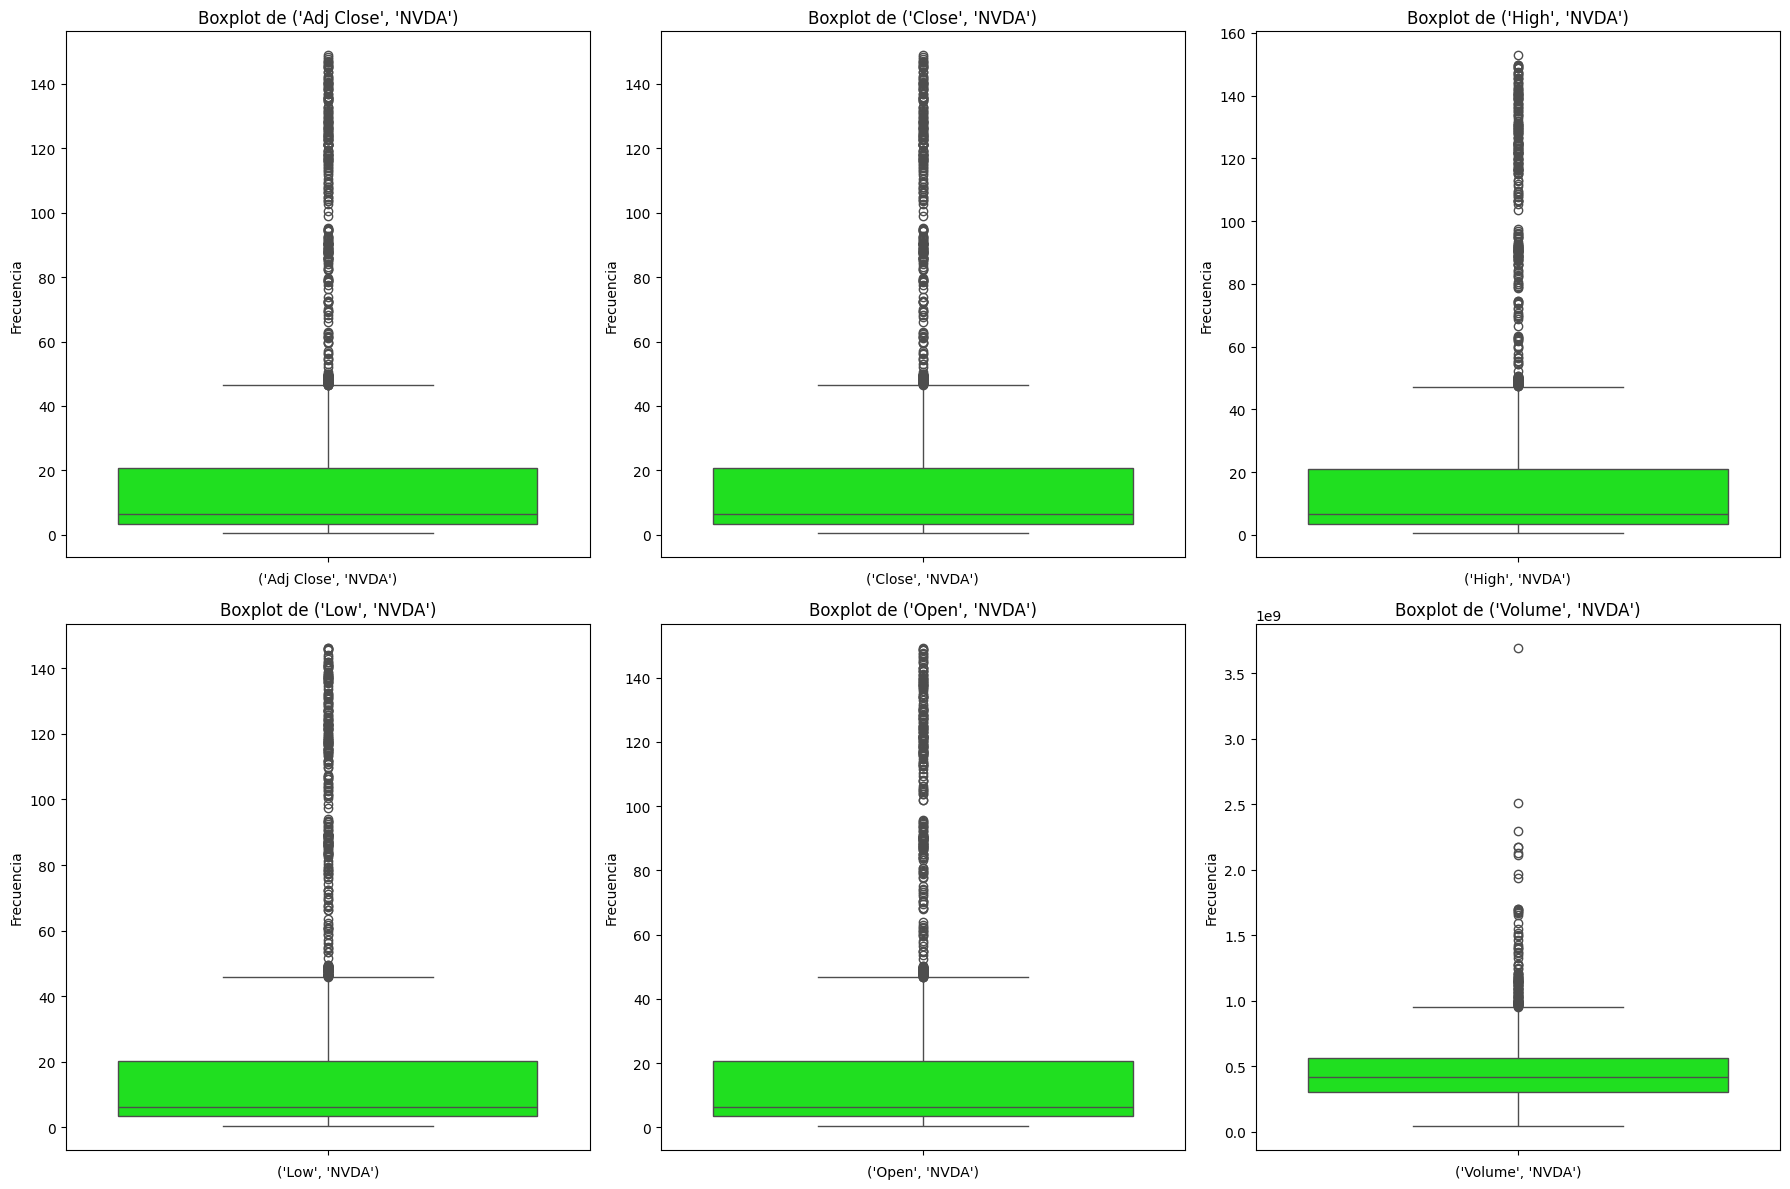

In [13]:
# Número total de gráficos y tamaño de la cuadrícula
num_cols = 3
num_rows = 2
total_plots = num_cols * num_rows

# Crea la figura y los ejes para los subgráficos
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))  # Ajusta el tamaño si es necesario
axes = axes.flatten()  # Aplana la matriz de ejes para facilitar la indexación

# Itera a través de las columnas numéricas y crea gráficos de boxplot
for i, column in enumerate(df_numeric.columns):
    if i < total_plots:  # Asegúrate de que no excedas el número de subgráficos
        sns.boxplot(y=stock_data[column], ax=axes[i], color='lime')  # Gráfico de boxplot
        axes[i].set_xlabel(column)  # Título del eje x con el nombre de la columna
        axes[i].set_ylabel("Frecuencia")  # Título del eje Y
        axes[i].set_title(f"Boxplot de {column}")  # Título del gráfico
    else:
        axes[i].axis('off')  # Apagar ejes no utilizados

# Ajustar el layout
plt.tight_layout()
plt.show()  # Mostrar todos los gráficos

La serie Volume presenta **datos atípicos (outliers)** en el extremo superior. Esto implica que, en algunos días, se negociaron volúmenes de acciones inusualmente altos en comparación con el comportamiento general.

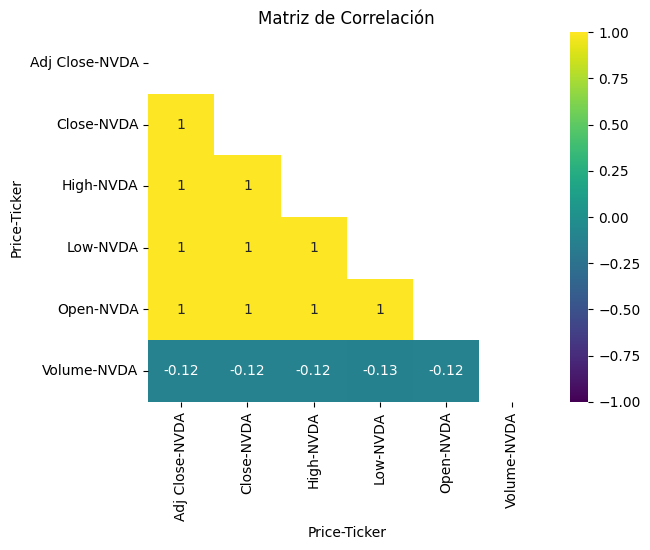

In [14]:
# Correlacion entre series
matrix = stock_data.drop(['Date'], axis=1).corr()
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='viridis', mask=mask)
plt.title('Matriz de Correlación')
plt.show()

Como se observa en el HeatMap, las series Open, Low, High, Close y Adj Close están **perfectamente correlacionadas** ya que explican el comportamiento de la misma variable (el precio de la acción).

Se considerará como variable objetivo la serie Close ya que corresponde al precio final de la acción.

In [15]:
stock_data.columns

MultiIndex([('Adj Close', 'NVDA'),
            (    'Close', 'NVDA'),
            (     'High', 'NVDA'),
            (      'Low', 'NVDA'),
            (     'Open', 'NVDA'),
            (   'Volume', 'NVDA'),
            (     'Date',     '')],
           names=['Price', 'Ticker'])

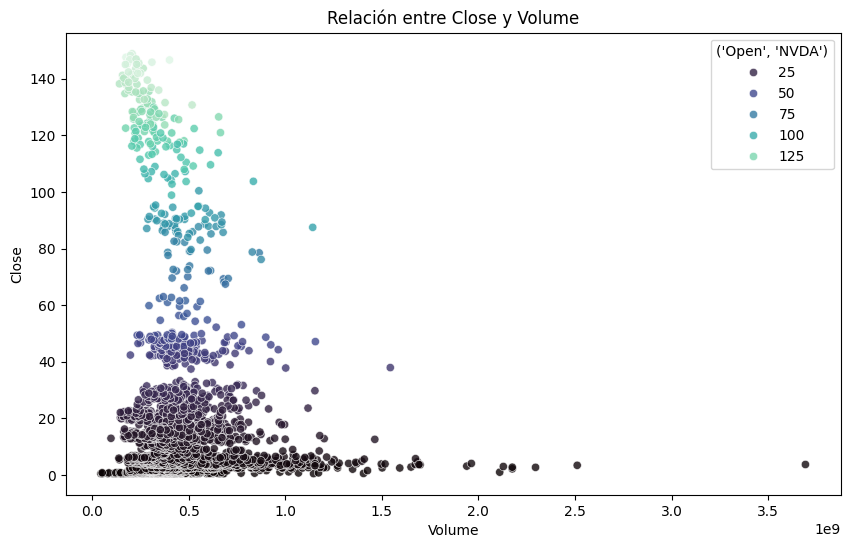

In [16]:
# Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=stock_data,
    x=("Volume", "NVDA"),
    y=("Close", "NVDA"),
    hue=("Open", "NVDA"),
    palette="mako",
    alpha=0.8,
)
plt.title("Relación entre Close y Volume")
plt.xlabel("Volume")
plt.ylabel("Close")
plt.show()

Como se puede apreciar no hay una correlación aparente entre las series de Volume y Close de NVIDIA. Se observa una alta concentración en la banda de Volume entre 0.0 y 1.5 siendo ésta más pronunciada en torno a 0.5.

<Figure size 640x480 with 0 Axes>

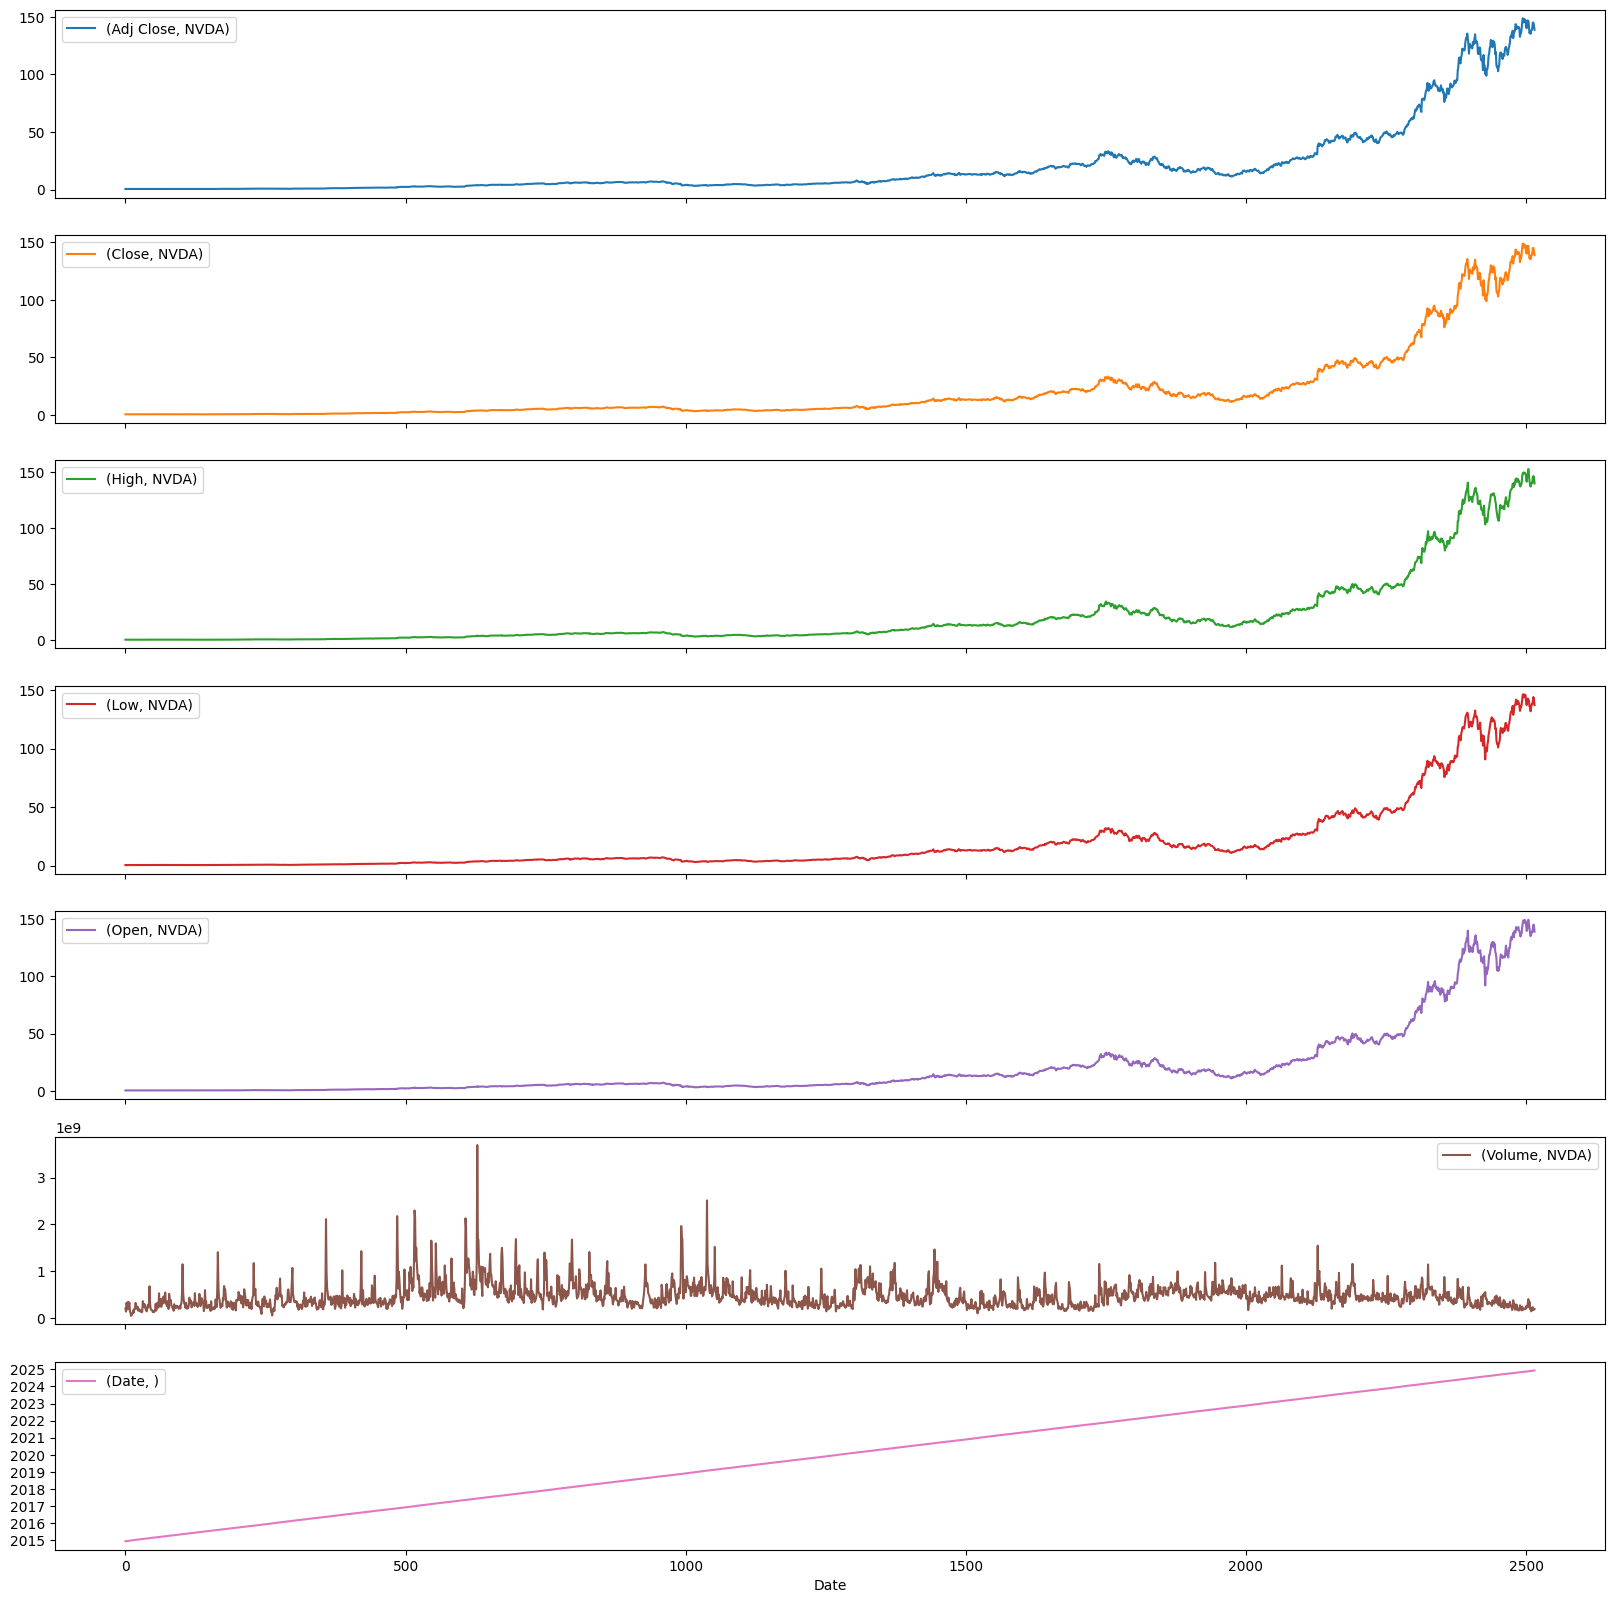

In [ ]:
# Series de tiempo
stock_data.plot(subplots=True, use_index=False, figsize=(20, 20))
plt.xlabel('Date')
plt.show()

En la gráfica se muestra el precio de las acciones de Nvidia en el mercado de valores de la compañía desde 2014. La tendencia es claramente alcista, lo que indica una valorización sostenida de la compañía en la última década. La serie de tiempo presenta picos esporádicos, que podrían estar relacionados con eventos significativos, como anuncios de resultados financieros o cambios en el mercado.

Precios (Close, High, Low, Open): Las series de tiempo indican un crecimiento sostenido y exponencial en el precio de las acciones de Nvidia desde 2014, con una aceleración notable en los últimos años, probablemente debido a su rol en sectores clave como IA y GPUs. Las fluctuaciones son consistentes con el comportamiento de un mercado en crecimiento.

Volumen negociado: El volumen presenta picos esporádicos, que podrían estar relacionados con eventos significativos, como anuncios de resultados financieros o cambios en el mercado.

Tendencia general: La tendencia es claramente alcista, lo que indica una valorización sostenida de la compañía en la última década.

## **1.4. Autocovarianza**

La autocovarianza es una medida de la covariación entre las observaciones de la serie consigo misma en diferentes momentos del tiempo.

coeficiente = 0 ➞ no hay corelación

coeficiente > 0 ➞ correlacón directa

coeficiente = 1 ➞ correlación perfecta directa

coeficiente < 0 ➞ correlación inversa

coeficiente = -1 ➞ correlación perfecta invesa


In [ ]:
#Calcular la varianza de la serie de tiempo
varianza = df['Close'].var()
print(varianza)

3215.1506791996003


In [ ]:
#Calcular la autocovarianza con lag de 1
autocovarianza_lag1 = df['Close'].cov(df['Close'].shift(1))
#Calcular la autocovarianza con lag de 7
autocovarianza_lag7 = df['Close'].cov(df['Close'].shift(7))
#Calcular la autocovarianza con lag de 30
autocovarianza_lag30 = df['Close'].cov(df['Close'].shift(30))
print("Autocovarianza:")
print("Autocovarianza con 1 rezago: ",round(autocovarianza_lag1,4))
print("Autocovarianza con 7 rezagos: ", round(autocovarianza_lag7,4))
print("Autocovarianza con 30 rezagos: ", round(autocovarianza_lag30,4))

Autocovarianza:
Autocovarianza con 1 rezago:  3207.5678
Autocovarianza con 7 rezagos:  3170.0382
Autocovarianza con 30 rezagos:  3038.8249


In [ ]:
print("Comparación con la varianza:")
print("Autocovarianza con 1 rezago:", round(autocovarianza_lag1 / varianza,4))
print("Autocovarianza con 7 rezagos:", round(autocovarianza_lag7 / varianza,4))
print("Autocovarianza con 30 rezagos:", round(autocovarianza_lag30 / varianza,4))

Comparación con la varianza:
Autocovarianza con 1 rezago: 0.9976
Autocovarianza con 7 rezagos: 0.986
Autocovarianza con 30 rezagos: 0.9452


Resultados cercanos a 1 significa que la autocovarianza es del mismo orden de magnitud que la varianza.
Cuando la autocovarianza es cercana a 1 en relación con la varianza, indica una fuerte relación lineal entre los valores de la serie de tiempo y sus valores rezagados en el tiempo. En este caso, parece que la serie de tiempo exhibe una autocorrelación significativa en varios rezagos, lo que puede indicar la presencia de un patrón temporal en los datos.

La autocovarianza es alta en los primeros rezagos, lo que implica que la serie de tiempo tiene una dependencia temporal significativa. Es decir, el valor de un día tiene una fuerte relación con los valores previos, y esa relación sigue siendo relevante incluso a lo largo de varias semanas (30 rezagos).

A medida que aumenta el rezago (hasta 30 días), la relación se debilita, lo que es normal en muchas series financieras, ya que los efectos inmediatos de los precios anteriores suelen ser más relevantes que los efectos de hace más tiempo. Sin embargo, el valor aún se mantiene bastante fuerte a 30 días, lo que sugiere una persistencia considerable en los precios a lo largo de un mes.

## **1.5. Autocorrelación**

La autocorrelación indica la fuerza y la dirección de la relación lineal entre los valores de la serie de tiempo en el tiempo actual y los valores de un periodo de tiempo anterior (rezago).


coeficiente = 0 ➞ no hay corelación

coeficiente > 0 ➞ correlacón directa

coeficiente = 1 ➞ correlación perfecta directa

coeficiente < 0 ➞ correlación inversa

coeficiente = -1 ➞ correlación perfecta invesa


In [ ]:
autocorrelation_lag1 = df['Close'].autocorr(lag=1)
print("Autocorrelación con 1 rezago: ", round(autocorrelation_lag1,4))

autocorrelation_lag7 = df['Close'].autocorr(lag=7)
print("Autocorrelación con 7 rezagos: ", round(autocorrelation_lag7,4))

autocorrelation_lag30 = df['Close'].autocorr(lag=30)
print("Autocorrelación con 30 rezagos: ", round(autocorrelation_lag30,4))

Autocorrelación con 1 rezago:  0.9991
Autocorrelación con 7 rezagos:  0.9963
Autocorrelación con 30 rezagos:  0.9896


Un valor cercano a 1 sugiere una fuerte autocorrelación positiva, lo que significa que los valores de la serie de tiempo están altamente correlacionados con sus valores en el período anterior.

La alta autocorrelación sugiere que la serie de tiempo tiene un comportamiento persistente, es decir, lo que ocurre en el pasado cercano (y no tan cercano) tiene una gran influencia en el comportamiento futuro. Esto es común en series financieras, donde el precio de un activo tiende a seguir un patrón o tendencia de corto y mediano plazo.

**GRÁFICOS DE AUTOCORRELACIÓN**

Los gráficos de la función de autocorrelación (ACF) y la función de autocorrelación parcial (PACF) son herramientas que ayudan a comprender la estructura de autocorrelación en una serie de tiempo y pueden proporcionar información útil para seleccionar modelos apropiados para el análisis y la predicción de series temporales.

1. **Función de Autocorrelación (ACF):** La ACF muestra la autocorrelación de una serie de tiempo con sus valores rezagados (conocidos como "lags").
En el eje x (horizontal) se encuentran los lags, que representan los períodos de tiempo anteriores.
En el eje y (vertical) se muestra el valor de la autocorrelación en cada lag.
Los puntos dentro de las bandas sombreadas indican valores de autocorrelación estadísticamente significativos, es decir, aquellos que están fuera de los límites establecidos por las bandas de confianza (determinadas por el parámetro alpha). *Interpretación:* Si la autocorrelación en un lag es significativamente diferente de cero (especialmente si está cerca de 1), indica una correlación lineal entre los valores de la serie de tiempo en ese lag y los valores actuales.
Si la autocorrelación disminuye gradualmente a medida que aumenta el lag y eventualmente se vuelve no significativa, sugiere que la serie de tiempo puede ser estacionaria.

2. **Función de Autocorrelación Parcial (PACF):** La PACF muestra la autocorrelación parcial de una serie de tiempo con sus valores rezagados, controlando los efectos de los rezagos intermedios.
Al igual que la ACF, en el eje x se encuentran los lags y en el eje y se muestra el valor de la autocorrelación parcial. *Interpretación:* Los valores de la PACF que son significativamente diferentes de cero indican la correlación entre los valores de la serie de tiempo en un lag particular y los valores actuales, controlando los efectos de los rezagos intermedios.

In [ ]:
# Importar librería
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

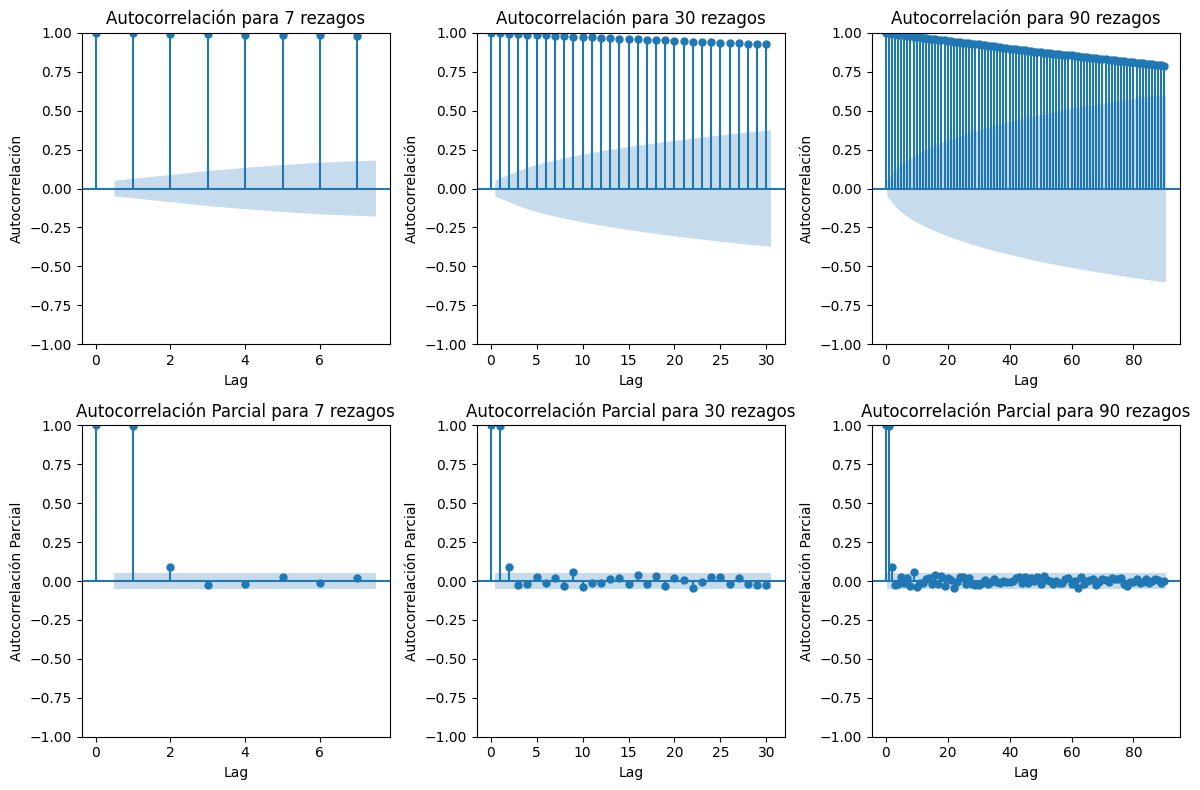

In [ ]:
# Números de rezagos
lag_numbers = [7, 30, 90]

# Títulos
titles_acf = ['Autocorrelación para 7 rezagos', 'Autocorrelación para 30 rezagos', 'Autocorrelación para 90 rezagos']
titles_pacf = ['Autocorrelación Parcial para 7 rezagos', 'Autocorrelación Parcial para 30 rezagos', 'Autocorrelación Parcial para 90 rezagos']

# Configurar el número total de gráficos
num_plots = len(lag_numbers)

# Configurar el número de filas y columnas
num_rows = 2
num_cols = num_plots

# Configurar el tamaño de la figura
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Generar los gráficos de ACF
for lag, title, ax in zip(lag_numbers, titles_acf, axes[0]):
    plot_acf(df['Close'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación')

# Generar los gráficos de PACF
for lag, title, ax in zip(lag_numbers, titles_pacf, axes[1]):
    plot_pacf(df['Close'], lags=lag, alpha=0.05, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Lag')
    ax.set_ylabel('Autocorrelación Parcial')

# Ajustar el espaciado entre subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()

En el gráfico de ACF casi todos los puntos están cerca de 1 y están muy por fuera del área pintada (es decir, las bandas de confianza), esto sugiere una fuerte correlación positiva en la serie de tiempo en varios rezagos (lags). Si la autocorrelación decae rápidamente (como en el caso del rezago de 90 días), sugiere que la dependencia temporal disminuye con el tiempo. Esto puede indicar que los valores de la serie están altamente influenciados por los eventos recientes, pero esa influencia disminuye a medida que se aleja en el tiempo.

La mayoría de los puntos en el gráfico de PACF están dentro de las bandas de confianza, esto sugiere que no hay correlaciones significativas después de controlar el efecto de los lags intermedios. A medida que los rezagos aumentan (30 y 90), la autocorrelación parcial se suaviza y los peaks de los primeros rezagos tienden a ser más pequeños, lo que indica que la dependencia directa de los valores pasados sobre el valor actual se vuelve más difusa con el tiempo.

La presencia simultánea de autocorrelación significativa en ACF y falta de correlaciones significativas en PACF puede indicar problemas como falta de estacionariedad o heterocedasticidad en los datos, lo que podría requerir un enfoque diferente en el análisis y modelización de la serie de tiempo.

No es normal que se den ambos casos simultáneamente, pero en algunos procesos o fenómenos del mundo real, puede haber características particulares que conduzcan a patrones inusuales en los gráficos de autocorrelación. En el caso del precio de las acciones esto se debe a la alta volatilidad.

## **1.6. Estacionariedad**

Una Serie de Tiempo es Estacionaria cuando la manera en que cambia es constante, es decir, sin tendencias ni patrones estacionales. Se asume estacionariedad para modelos de pronóstico, por lo que es importante evaluarla antes de realizar los modelos.

Una forma sólida de calcular y mostrar la estacionariedad de una serie de tiempo es a través de dos test:La prueba de Dickey-Fuller aumentada (ADF) y la prueba de Kwiatkowski-Phillips-Schmidt-Shin (KPSS). Estas evaluaciones usan estadísticos de prueba y test de hipótesis para su evaluación.

1.   **Dickey-Fuller (ADF):** Evalúa si hay raíces unitarias en una serie temporal. Este test tiene como hipótesis nula que la serie de tiempo *no es estacionaria*.  Si el valor p es *menor* que el umbral (generalmente 0.05), se rechaza la hipótesis nula, lo que sugiere que la serie *es estacionaria*.

2.   **Kwiatkowski-Phillips-Schmidt-Shin (KPSS):** Evalúa si una serie temporal es tendenciosa estacionaria o no estacionaria. La hipótesis nula este test indica que la serie de tiempo *es estacionaria*. Si el valor p es *menor* que el umbral (generalmente 0.05), se rechaza la hipótesis nula , lo que sugiere que la serie *no es estacionaria*.


In [ ]:
# Importar librerías para test de estacionariedad
from statsmodels.tsa.stattools import adfuller,kpss

In [ ]:
# Definir función para calcular estacionariedad
def print_results(output, test='adf'):
    pval = output[1]
    test_score = output[0]
    lags = output[2]
    decision = 'No Estacionaria'
    if test == 'adf':
        critical = output[4]
        if pval < 0.05:
            decision = 'Estacionaria'
    elif test=='kpss':
        critical = output[3]
        if pval >= 0.05:
            decision = 'Estacionaria'
    output_dict = {
    'Test Statistic': test_score,
    'p-value': pval,
    'Rezagos': lags,
    'Decisión': decision
    }
    for key, value in critical.items():
        output_dict["Critical Value (%s)" % key] = value

    return pd.Series(output_dict, name=test)

In [ ]:
adf_output = adfuller(df['Close'])
kpss_output = kpss(df['Close'])
pd.concat([
    print_results(adf_output, 'adf'),
    print_results(kpss_output, 'kpss')
    ], axis=1)

C:\Users\gonza\AppData\Local\Temp\ipykernel_16684\2259141138.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_output = kpss(df['Close'])


,adf,kpss
Test Statistic,1.74,5.41
p-value,1.00,0.01
Rezagos,24,25
Decisión,No Estacionaria,No Estacionaria
Critical Value (1%),-3.43,0.74
Critical Value (5%),-2.86,0.46
Critical Value (10%),-2.57,0.35
Critical Value (2.5%),NaN,0.57


Test de Dickey-Fuller Aumentado (ADF): El valor p (p-value) es 1.00 y como este es mayor que cualquier nivel de significancia típico (como 0.05), no podemos rechazar la hipótesis nula de que la serie de tiempo tiene una raíz unitaria.

Test de Kwiatkowski-Phillips-Schmidt-Shin (KPSS): El valor p (p-value) es 0,01 y dado que este valor p es menor que el nivel de significancia típico (0.05), rechazamos la hipótesis nula de que la serie de tiempo es estacionaria alrededor de una tendencia determinista.

En otras palabras, hay suficiente evidencia para concluir que la serie de tiempo **no es estacionaria** según ambos test.

En modelos de series de tiempo como AR, MA y ARIMA, uno de los supuestos fundamentales es que la serie es estacionaria. Si este supuesto no se cumple, la autocovarianza puede cambiar con el tiempo, y no se podrá capturar la estructura temporal adecuadamente.

Se deben tomar medidas para transformar la serie en estacionaria, como la diferenciación o el suavizado, antes de usarla en un modelo de series de tiempo.

## **1.7. Estacionalidad**

La estacionalidad implica la presencia de patrones regulares que se repiten en intervalos específicos, como ciclos anuales o mensuales, independientemente de la tendencia a largo plazo.

**Descomposición**

Al descomponer la serie, el componente estacional revela el patrón repetitivo. Esto es útil para confirmar visualmente la periodicidad.

In [ ]:
# Importar libreria para realizar descomposición de la serie
from statsmodels.tsa.api import (seasonal_decompose)

In [ ]:
# Establecer formato de tamaño de gráficos
plt.rcParams["figure.figsize"] = [8, 5]

Text(0.5, 1.05, 'Descomposición de la serie en 30 días (modelo aditivo)')

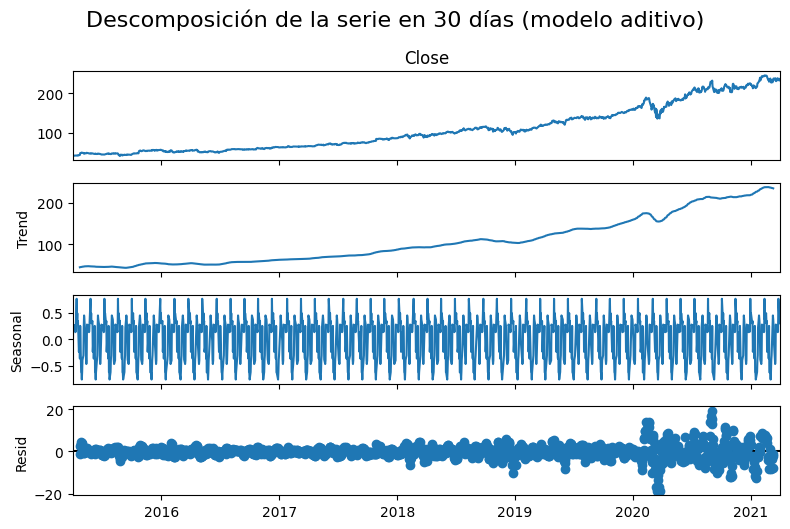

In [ ]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],period=30)
sd.plot();
plt.suptitle('Descomposición de la serie en 30 días (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo aditivo)')

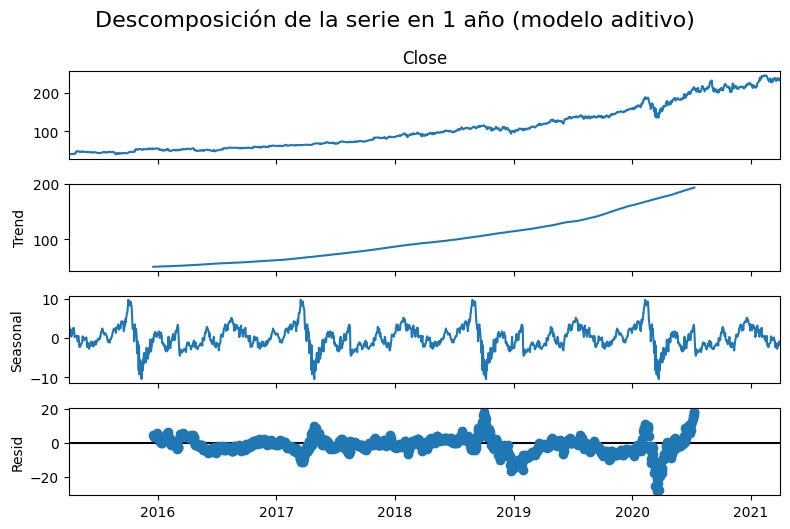

In [ ]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo aditivo)', fontsize=16, y=1.05)

Text(0.5, 1.05, 'Descomposición de la serie en 1 año (modelo multiplicativo)')

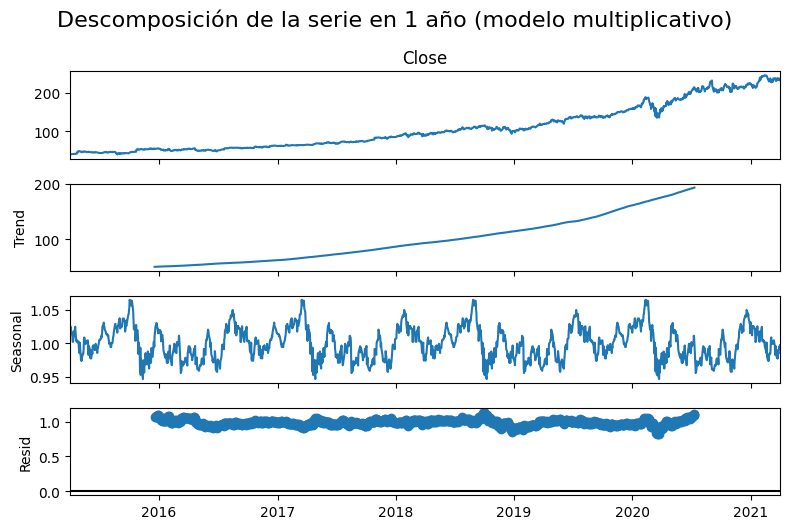

In [ ]:
# Descomposición de la serie
sd = seasonal_decompose(df["Close"],model="multiplicative",period=365)
sd.plot();
plt.suptitle('Descomposición de la serie en 1 año (modelo multiplicativo)', fontsize=16, y=1.05)

**Periodograma**

El periodograma es una herramienta que muestra cómo se distribuye la variación de la serie de tiempo en función de las frecuencias, y se utiliza para identificar patrones cíclicos o estacionales.

El periodograma analiza las frecuencias dominantes en la serie, útil para series con ciclos menos evidentes.

En el periodograma, la presencia de peaks en frecuencias específicas puede indicar estacionalidad. Estos peaks corresponden a patrones repetitivos (cíclicos) en la serie de tiempo.


*   ▶ Frecuencias bajas pueden estar asociadas con tendencias a largo plazo.
*   ▶ Frecuencias más altas podrían indicar ciclos más cortos o estacionales.

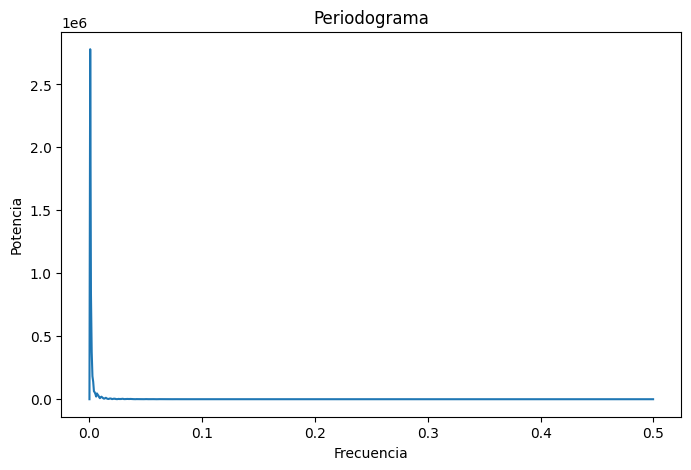

In [ ]:
from scipy.signal import periodogram

frequencies, power = periodogram(df['Close'])
plt.plot(frequencies, power)
plt.title('Periodograma')
plt.xlabel('Frecuencia')
plt.ylabel('Potencia')
plt.show()

La frecuencia 0 representa la tendencia constante o de largo plazo en la serie de tiempo. Un peak alto en esta frecuencia significa que la mayor parte de la varianza en la serie de tiempo proviene de un componente de tendencia, no de fluctuaciones estacionales o cíclicas.

Un periodograma plano fuera de la frecuencia 0 indica que no hay fluctuaciones cíclicas dominantes a ninguna frecuencia específica. Esto significa que tu serie no tiene patrones estacionales evidentes.

Por lo tanto, hay señales claras de **estacionalidad** o ciclos significativos.